In [1]:
#k-NN is often used in search applications when looking for "similar" items.
#For example, searching for semantically similar documents, or
#recommender systems (i.e. If you like Batman, you should try Superman)
#k-NN can also be used to recommend advertisements to display to a user

In [2]:
#This fake data set from Kaggle.com is a "classified" data set from some company
#The feature column names are hidden but they have given the data and target class
#Goal: create a k-NN model that predicts a class for a new data point
#based off of its features

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#read in the data as a dataframe

df = pd.read_csv('Classified Data', index_col=0)

In [5]:
#Check out the data

df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [8]:
#because the k-NN algorithm predicts the class of an observation by identifying
#the observations nearest to it, the scale of the variables is important.
#Any variables that are on a larger scale will have a larger effect on the 
#k-NN classifier, so we need to scale the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
#create an instance of StandardScaler()

scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
#now that the data is scaled, we create a new dataframe with the scaled features

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [15]:
#Check out the scaled data

In [16]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [17]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
WTT    1000 non-null float64
PTI    1000 non-null float64
EQW    1000 non-null float64
SBI    1000 non-null float64
LQE    1000 non-null float64
QWG    1000 non-null float64
FDJ    1000 non-null float64
PJF    1000 non-null float64
HQE    1000 non-null float64
NXJ    1000 non-null float64
dtypes: float64(10)
memory usage: 78.2 KB


In [18]:
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.394440e-16,-2.658984e-16,-9.992007e-17,-1.432188e-16,-6.134537e-16,2.486900e-17,6.682432e-16,-4.778400e-16,3.358980e-16,4.650169e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


In [19]:
#Begin machine learning process, split the data into training set and test set

from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [21]:
#Create the model to predict the target class, 0 or 1

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#create an instance of KNeighborsClassifier() with number of neighbors = 1.
#later we will modify number of neighbors to get the most accurate model

In [24]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [25]:
#train the model on the training set

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
#create a variable called pred to hold the predictions against the X_test set

pred = knn.predict(X_test)

In [27]:
#Evaluate the model

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[127  18]
 [ 14 141]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       145
           1       0.89      0.91      0.90       155

   micro avg       0.89      0.89      0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [31]:
#the model is about 89% accurate, but we can improve the accuracy by
#adjusting the number of nearest neighbors the algorithm takes into account
#We will use the elbow method to help choose a suitable k value

In [32]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
#This for-loop will run the k-nn algorithm 40 times, using 1-40 as values for k.
#For each iteration, it will calculate the error rate, which we will then
#graph and be able to visualize which values for k will yield the best results

Text(0, 0.5, 'Error Rate')

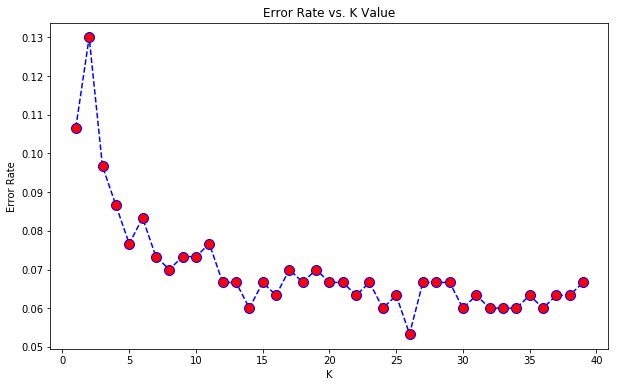

In [33]:
#graph the error rate vs K value for k in range(1,40)

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
#It looks like after K>20 the error rate is about 0.05-0.06
#We can retrain the model with k=26 and check if our results are better.

In [35]:
#Original k=1:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('With k=1:')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With k=1:


[[127  18]
 [ 14 141]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       145
           1       0.89      0.91      0.90       155

   micro avg       0.89      0.89      0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [36]:
#now we try k=26:

knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('With k=26:')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With k=26:


[[135  10]
 [  6 149]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       145
           1       0.94      0.96      0.95       155

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
#using the elbow method, we were able to increase our model's accuracy from
#89% to 95%.